# **AUTISM SPECTRUM DISORDER PREDICTION USING MACHINE LEARNING**

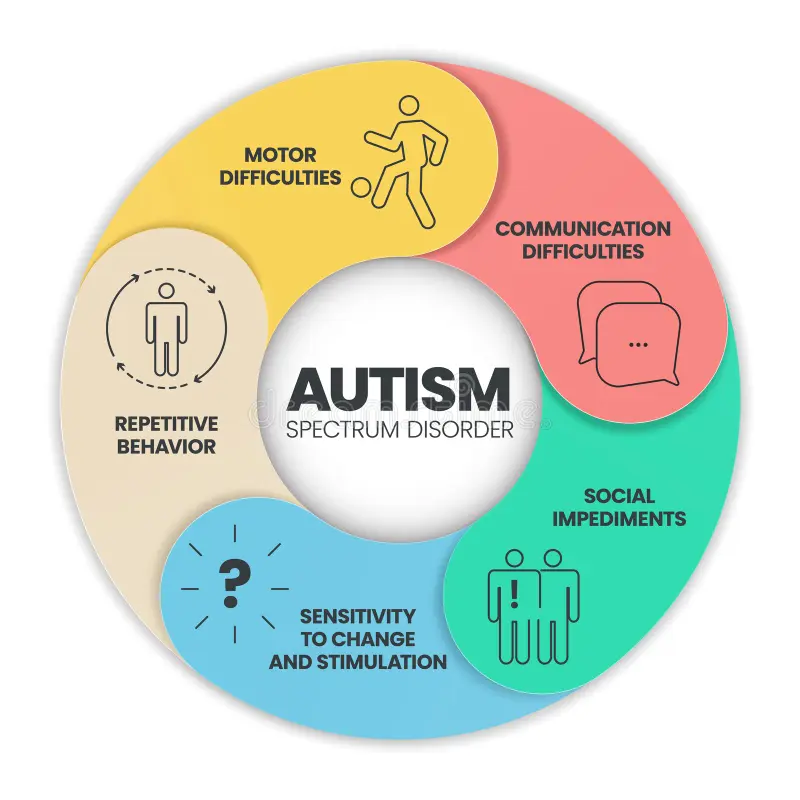

# Problem Definition

Autism Spectrum Disorder (ASD) affects millions globally, with early intervention being crucial for improving life outcomes. However, diagnosing autism can be subjective and time-intensive.

This project aims to develop a machine learning-based prediction model to assist in the early detection of autism using key features from a dataset. The goal is to create an efficient and reliable tool that supports healthcare professionals and families in identifying potential cases of autism, thereby facilitating timely intervention.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading of data
data = pd.read_csv('/content/Autism_data.csv')

In [3]:
pd.set_option("display.max_columns",None) # get all the columns
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


### Features
* ID - ID of the patient
* A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* age - Age of the patient in years
* gender - Gender of the patient
* ethnicity - Ethnicity of the patient
* jaundice - Whether the patient had jaundice at the time of birth
* autism - Whether an immediate family member has been diagnosed with autism
* contry_of_res - Country of residence of the patient
* used_app_before - Whether the patient has undergone a screening test before
* result - Score for AQ1-10 screening test
* age_desc - Age of the patient
* relation - Relation of patient who completed the test
* Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column

# **Data Cleaning**

In [4]:
data.shape

(800, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
# feature with no.of its unique values and data type
unique_table = pd.DataFrame({"Feature": data.columns,
   "No_Unique_Values":[data[col].nunique() for col in data.columns],
                             "Data_Type":[data[col].dtype for col in data.columns]})
unique_table

,Feature,No_Unique_Values,Data_Type
0,ID,800,int64
1,A1_Score,2,int64
2,A2_Score,2,int64
3,A3_Score,2,int64
4,A4_Score,2,int64
5,A5_Score,2,int64
6,A6_Score,2,int64
7,A7_Score,2,int64
8,A8_Score,2,int64
9,A9_Score,2,int64


In [7]:
# all the unique values in the non numerical features
for col in data.columns:
  numerical_columns = data.select_dtypes(include=['int64','float64']).columns
  if col not in numerical_columns:
    print(col , data[col].unique())
    print("---"*50)

gender ['f' 'm']
------------------------------------------------------------------------------------------------------------------------------------------------------
ethnicity ['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' '?'
 'others' 'Latino' 'Turkish' 'Others' 'Hispanic' 'Pasifika']
------------------------------------------------------------------------------------------------------------------------------------------------------
jaundice ['no' 'yes']
------------------------------------------------------------------------------------------------------------------------------------------------------
austim ['no' 'yes']
------------------------------------------------------------------------------------------------------------------------------------------------------
contry_of_res ['United States' 'Australia' 'United Kingdom' 'New Zealand' 'Italy'
 'Nicaragua' 'Canada' 'United Arab Emirates' 'Netherlands' 'Sri Lanka'
 'India' 'Armenia' 'Sierra Leone' 'Argentin

In [8]:
# Convert age column datatype to integer
data['age'] = data['age'].astype(int)

In [9]:
# Rename the column Name Autism and country of residence
data = data.rename(columns={'austim':'autism'})
data = data.rename(columns={'contry_of_res':'Country_of_res'})

In [10]:
# Dropping 'age_desc' column since its irrelevent
data = data.drop(columns=['age_desc','ID'],axis=1)

In [11]:
# Replacing the '?' of ethnicity with the mode value
data['ethnicity'] = data['ethnicity'].replace('?', data['ethnicity'].mode()[0])

In [12]:
# Replacing the 'others' of ethnicity with 'Others'
data['ethnicity'] = data['ethnicity'].replace('others','Others')

In [13]:
# replacing country names in the 'Country_of_res' column
mapping = {'Viet Nam':'Vietnam',
           'AmericanSamoa':'United States',
           'Hong Kong': 'China'}
data['Country_of_res'] = data['Country_of_res'].replace(mapping)

In [14]:
# Replacing the '?' of Relation with the mode value
data['relation'] = data['relation'].replace('?', data['relation'].mode()[0])

In [15]:
# Checking for nan values
data.isna().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [16]:
# Checking for duplicate values
data.duplicated().sum()

0

In [17]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,Country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,Self,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,United Kingdom,no,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,New Zealand,no,1.530098,Self,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,Italy,no,7.949723,Self,0


 `Yaay Data is Almost Cleaned 😀!!!`

# **EDA** - Exploratory Data Analysis

Age Mean:  28.115
Age Median:  25.0


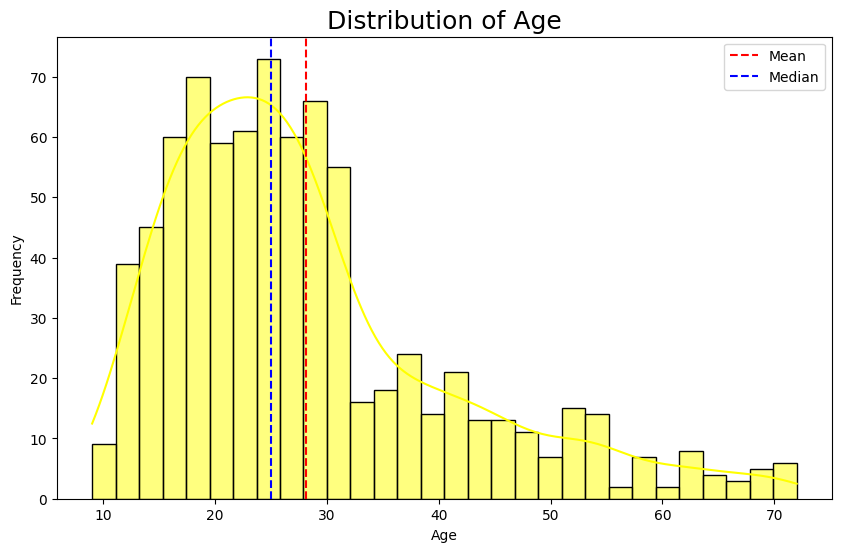

In [18]:
plt.figure(figsize=(10,6))
age_mean = data['age'].mean()
age_median = data['age'].median()
print("Age Mean: ",age_mean)
print("Age Median: ",age_median)
sns.histplot(data['age'],kde=True,bins=30,color='yellow')
plt.axvline(age_mean,color='red',linestyle='dashed',label='Mean')
plt.axvline(age_median,color='blue',linestyle='--',label='Median')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age", fontsize=18)
plt.show()

Result Mean:  7.05852953134875
Result Median:  6.8934719235


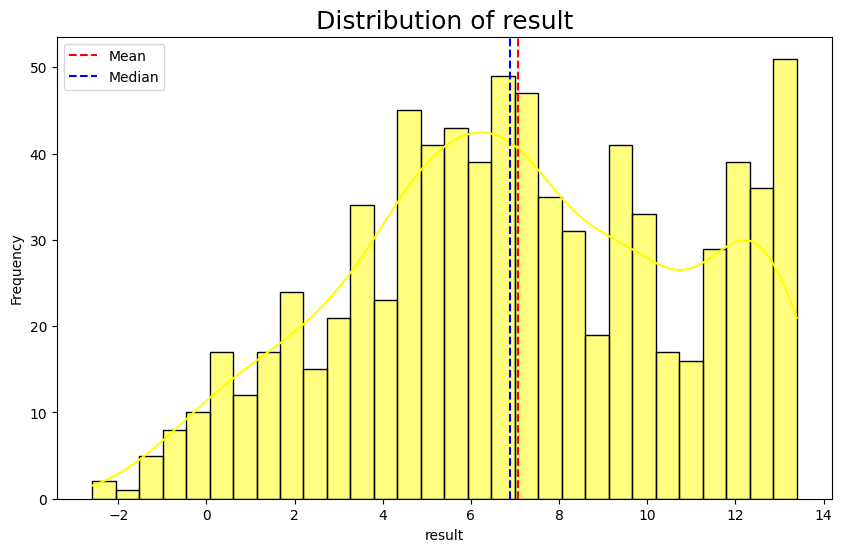

In [19]:
plt.figure(figsize=(10,6))
result_mean = data['result'].mean()
result_median = data['result'].median()
print("Result Mean: ",result_mean)
print("Result Median: ",result_median)
sns.histplot(data['result'],kde=True,bins=30,color='yellow')
plt.axvline(result_mean,color='red',linestyle='dashed',label='Mean')
plt.axvline(result_median,color='blue',linestyle='--',label='Median')
plt.legend()
plt.xlabel("result")
plt.ylabel("Frequency")
plt.title("Distribution of result", fontsize=18)
plt.show()

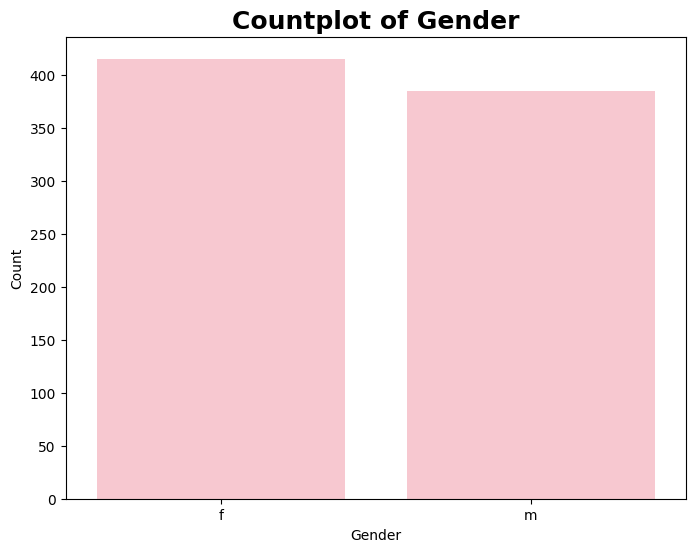

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x = data['gender'],color='pink')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Countplot of Gender", fontsize=18,fontweight='bold')
plt.show()

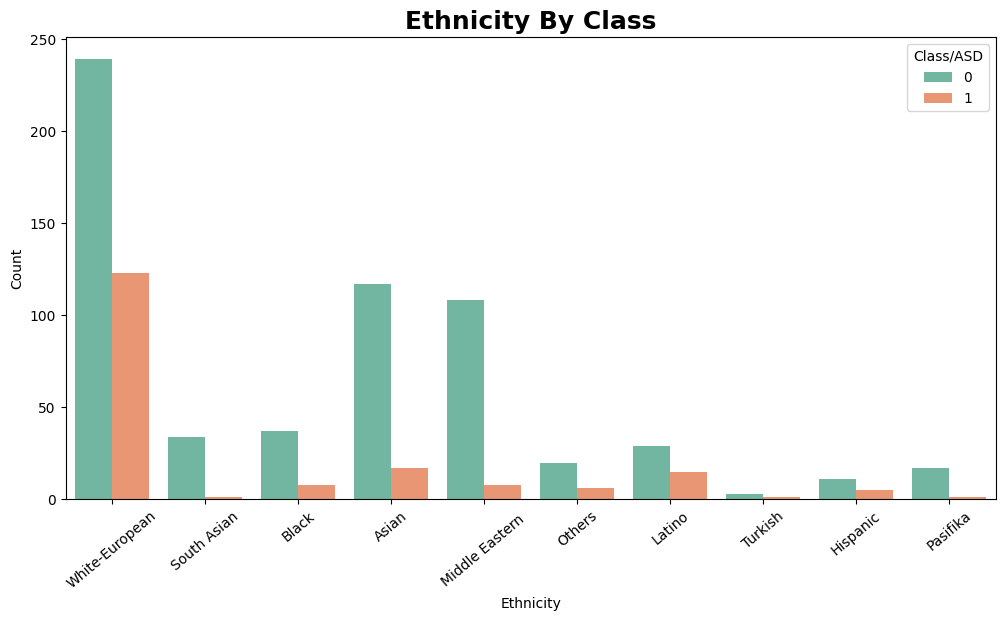

In [21]:
# Ethnicity by Class/ASD
plt.figure(figsize=(12,6))
sns.countplot(x = data['ethnicity'],hue=data['Class/ASD'],palette='Set2')
plt.xlabel('Ethnicity')
plt.ylabel("Count")
plt.xticks(rotation=40)
plt.title("Ethnicity By Class",fontsize=18,fontweight='bold')
plt.show()

In [22]:
jaundice_by_class = data.groupby('jaundice')['Class/ASD'].value_counts()
jaundice_by_class = jaundice_by_class.unstack()
jaundice_by_class

Class/ASD,0,1
jaundice,,
no,492,112
yes,123,73


<Figure size 800x500 with 0 Axes>

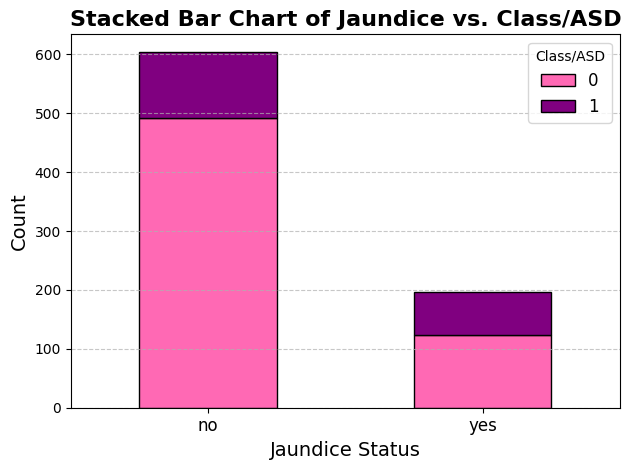

In [23]:
plt.figure(figsize=(8,5))
jaundice_by_class.plot(kind='bar',
    stacked=True,
    color=['hotpink', 'purple'],
    edgecolor='black'
)
plt.title('Stacked Bar Chart of Jaundice vs. Class/ASD', fontsize=16, fontweight='bold')
plt.xlabel('Jaundice Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Class/ASD', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
autism_in_relative_by_class = data.groupby('autism')['Class/ASD'].value_counts()
autism_in_relative_by_class = autism_in_relative_by_class.unstack()
autism_in_relative_by_class

Class/ASD,0,1
autism,,
no,570,113
yes,45,72


<Figure size 800x500 with 0 Axes>

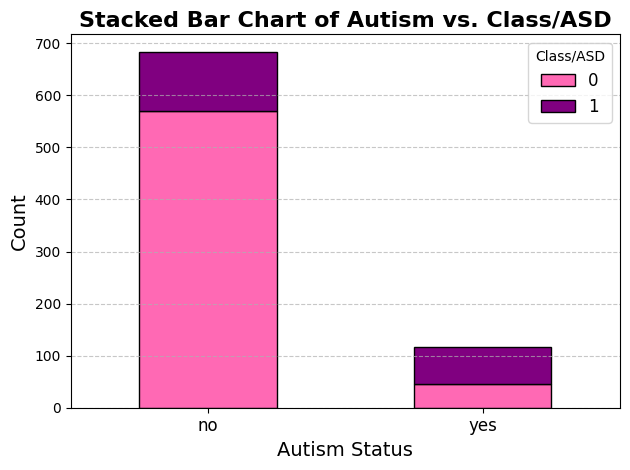

In [25]:
plt.figure(figsize=(8,5))
autism_in_relative_by_class.plot(kind='bar',
    stacked=True,
    color=['hotpink', 'purple'],
    edgecolor='black'
)
plt.title('Stacked Bar Chart of Autism vs. Class/ASD', fontsize=16, fontweight='bold')
plt.xlabel('Autism Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Class/ASD', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

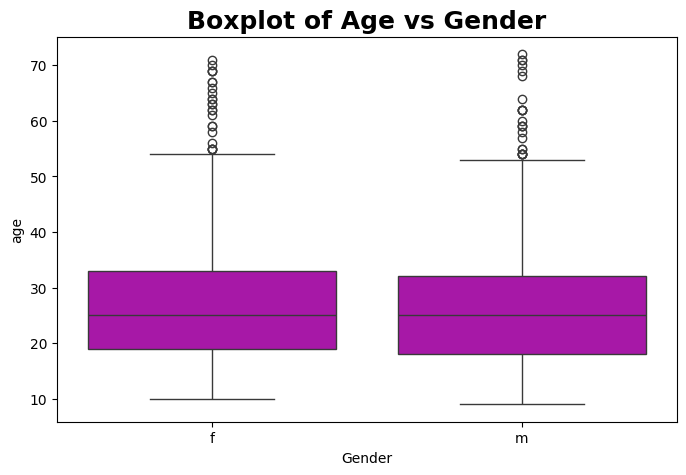

In [26]:
# boxplot of age
plt.figure(figsize=(8,5))
sns.boxplot(x=data['gender'],y=data['age'],color='m')
plt.xlabel('Gender')
plt.title('Boxplot of Age vs Gender',fontsize=18,fontweight='bold')
plt.show()

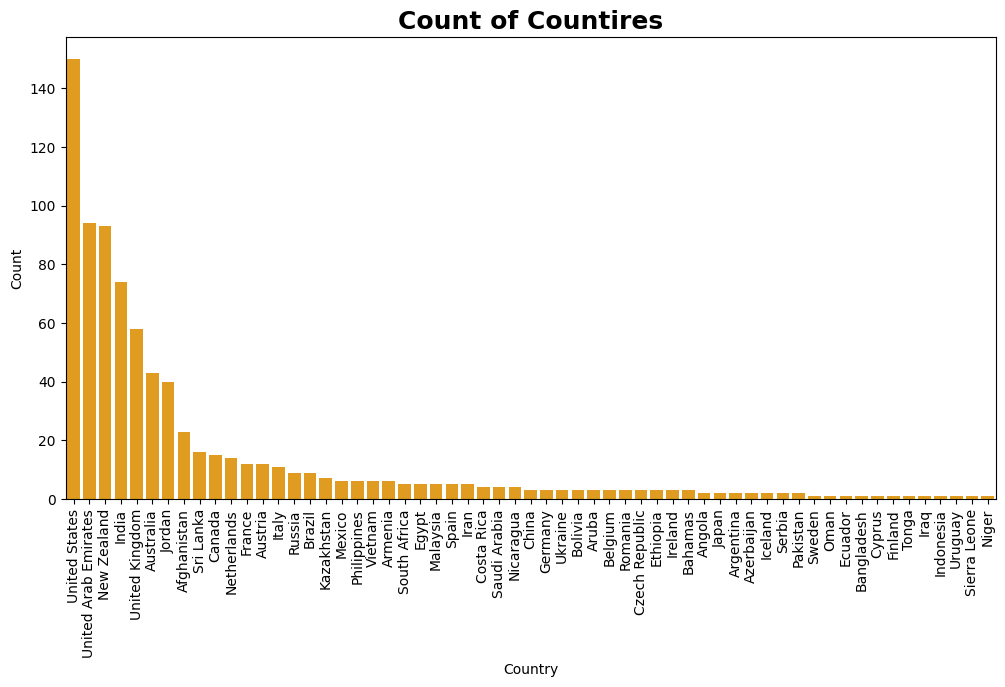

In [27]:
plt.figure(figsize=(12, 6))
country_counts = data['Country_of_res'].value_counts(ascending=False)
sns.countplot(data=data, x='Country_of_res', order=country_counts.index,color='orange')
plt.xlabel("Country")
plt.ylabel("Count")
plt.title('Count of Countires',fontsize=18,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

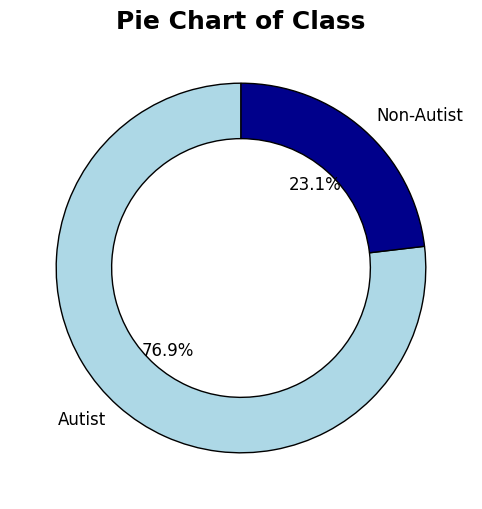

In [28]:
plt.figure(figsize=(10,6))
counts = data['Class/ASD'].value_counts()
autism_map = {'Autist':1,'Non-Autist':0}
autism_color = ['lightblue','darkblue']
plt.pie(counts ,labels = autism_map ,colors=autism_color, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3, 'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title("Pie Chart of Class",fontsize=18,fontweight='bold')
plt.gca().set_aspect("equal")
plt.show()

In [29]:
class_by_gender = data.groupby('gender')['Class/ASD'].value_counts()
class_by_gender.unstack()

Class/ASD,0,1
gender,,
f,298,117
m,317,68


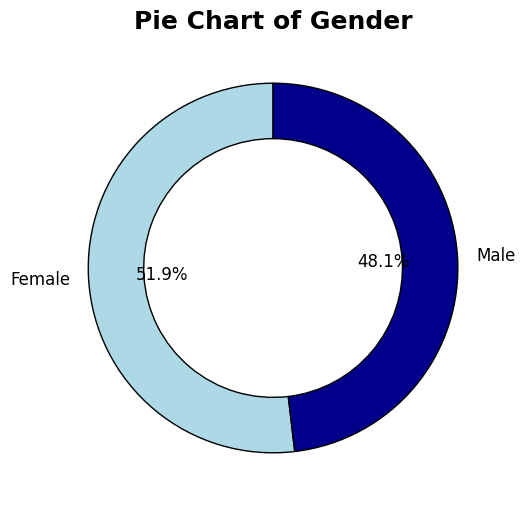

In [30]:
plt.figure(figsize=(10,6))
gender_map = {'Female': 'f','Male': 'm'}
gender_color = ['lightblue','darkblue']
plt.pie(data['gender'].value_counts() ,labels = gender_map , colors= gender_color, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3,'edgecolor':'black'}, textprops={'fontsize': 12})
plt.title("Pie Chart of Gender",fontsize=18,fontweight='bold')
plt.gca().set_aspect("equal")
plt.show()

In [31]:
class_by_gender = data.groupby('gender')['Class/ASD'].value_counts()
class_by_gender.unstack()

Class/ASD,0,1
gender,,
f,298,117
m,317,68


In [32]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.11500,7.058530,0.231250
std,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.88611,3.788969,0.421896
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.00000,-2.594654,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.00000,4.527556,0.000000
50%,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.00000,6.893472,0.000000
75%,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.00000,9.892981,0.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.00000,13.390868,1.000000


### **Key Insights from EDA**
1. The average age of individuals in the dataset is 28 years.
2. White European individuals have a significantly higher prevalence of autism.
3. Individuals with jaundice at birth exhibit a higher likelihood of developing autism.
4. Having a family member with autism increases the chances of being diagnosed with ASD.
5. The dataset shows a distribution of 76% non-autistic individuals and 23% autistic individuals.
6. The gender distribution in the dataset is relatively balanced, with 51% males and 48% females.


# **Data Preprocessing**

In [33]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,Country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,Self,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,United Kingdom,no,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,New Zealand,no,1.530098,Self,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,Italy,no,7.949723,Self,0


- TO-DO LIST
- 1. encoding categorical data
- 2. finding correlation  
- 3. balancing class
- 4. scaling numerical data

### Label Encoding

In [34]:
# Label Encoding of Categorical Data
categorial_columns = data.select_dtypes(include=['object']).columns
categorial_columns

Index(['gender', 'ethnicity', 'jaundice', 'autism', 'Country_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorial_columns:
  data[col] = le.fit_transform(data[col])


In [36]:
for col in categorial_columns:
  print(f"{data[col].unique()} - {col}" )

[0 1] - gender
[9 7 1 0 4 5 3 8 2 6] - ethnicity
[0 1] - jaundice
[0 1] - autism
[56  5 55 37 30 38 13 54 36 50 25  3 47  2  7 24 19 46  0 15 32  1 41 12
 29 33 58 20  6 21 22 34 31 49 42 27 17 44 43 35 10  4 57 26 53 23 14 28
 52 48 45  8 18 16  9 40 11 51 39] - Country_of_res
[0 1] - used_app_before
[4 0 2 3 1] - relation


In [37]:
data['Country_of_res'].nunique()

59

In [38]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,Country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,0,9,0,0,56,0,7.819715,4,0
1,0,0,0,0,0,0,0,0,0,1,13,0,7,0,0,5,0,10.544296,4,0
2,1,1,1,1,1,1,0,0,1,1,14,0,9,0,0,55,0,13.167506,4,1
3,0,0,0,1,0,0,0,0,0,0,61,0,7,0,0,37,0,1.530098,4,0
4,0,0,0,0,1,0,0,0,1,1,14,1,1,0,1,30,0,7.949723,4,0


### Correlation Matrix

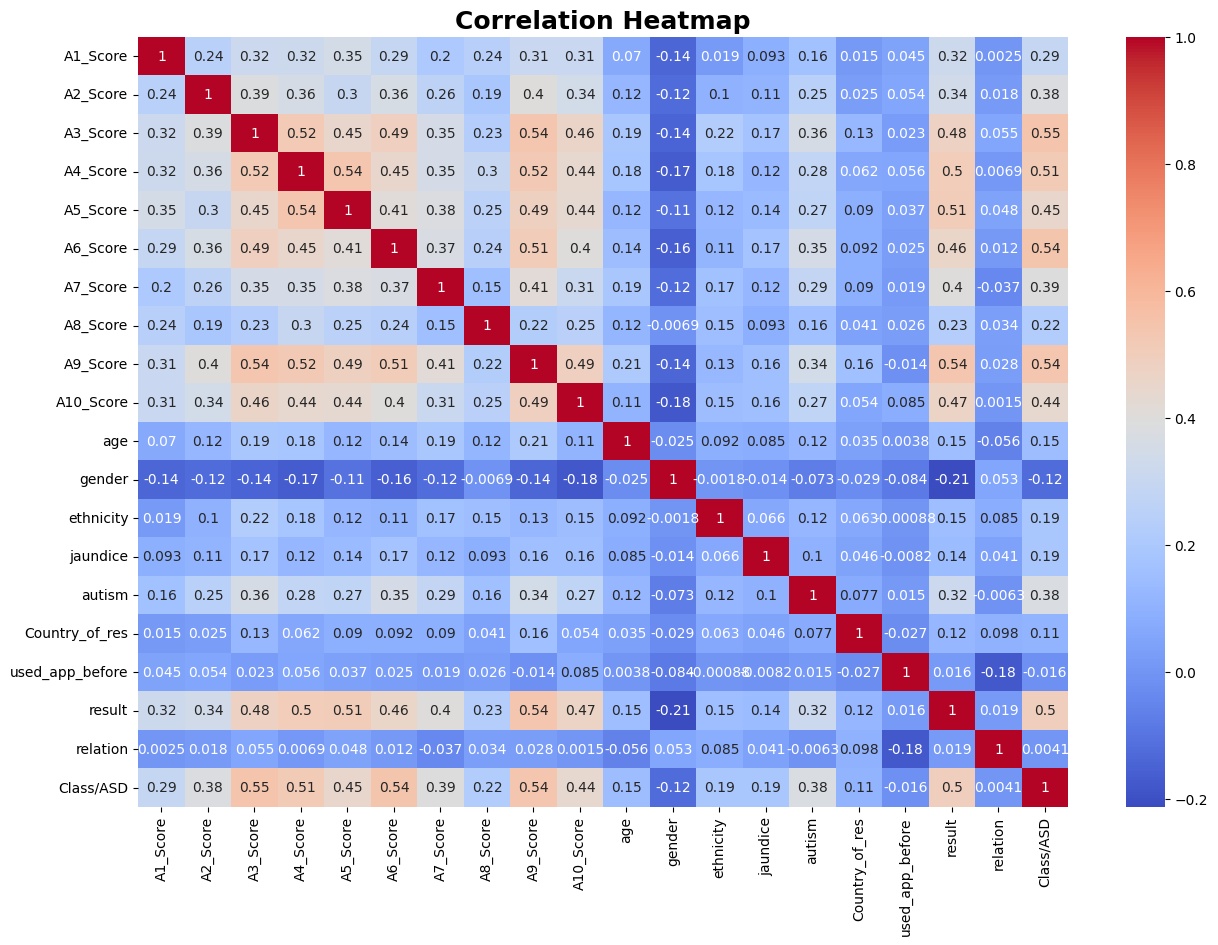

In [39]:
# Correlation
correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation , annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap",fontsize=18,fontweight='bold')
plt.show()

# Inference
- There is a strong positive correlation (0.5) between 'class/ASD' and 'Result'.
- A negative correlation exists between 'class/ASD' and 'Gender'.
- 'Result' and 'Gender' also show a negative correlation.
- A high positive correlation is observed between 'class/ASD' and 'Autism identified in family relative'.
- Scores A6, A3, and A4 show a high correlation with 'class/ASD'.



### Balancing the Class

In [40]:
data['Class/ASD'].value_counts()

,count
Class/ASD,
0,615
1,185


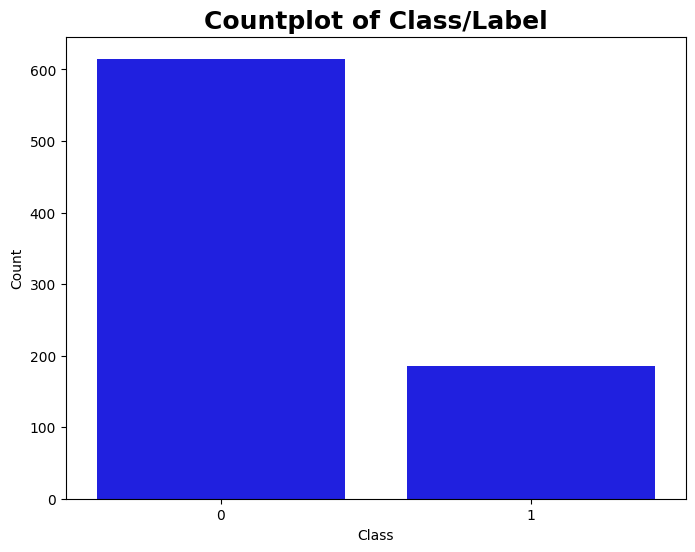

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x = data['Class/ASD'],color='blue')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Countplot of Class/Label", fontsize=18,fontweight='bold')
plt.show()

`Oh yeah , our Data is highly imbalanced`










In [42]:
# Up sample minority Class
# separating the DF with 0 and 1 class
df1 = data[data['Class/ASD'] == 0]
df2 = data[data['Class/ASD'] == 1]

from sklearn.utils import resample
df2_upsample = resample(df2,replace=True,n_samples=len(df1),random_state=42) # upsampling
df = pd.concat([df1,df2_upsample]) # concatinate both into one dataset

In [43]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,615
1,615


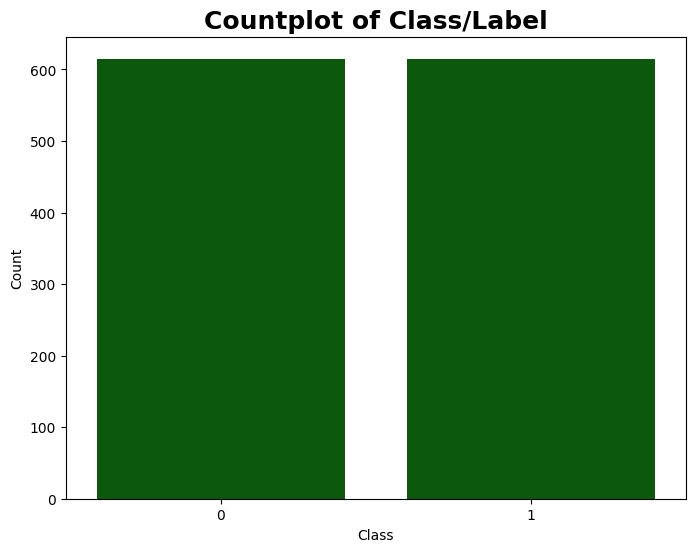

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x = df['Class/ASD'],color='darkgreen')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Countplot of Class/Label", fontsize=18,fontweight='bold')
plt.show()

`Woah ! Its perfect now`  

### Scaling of numerical Data

In [45]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,Country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,0,9,0,0,56,0,7.819715,4,0
1,0,0,0,0,0,0,0,0,0,1,13,0,7,0,0,5,0,10.544296,4,0
3,0,0,0,1,0,0,0,0,0,0,61,0,7,0,0,37,0,1.530098,4,0
4,0,0,0,0,1,0,0,0,1,1,14,1,1,0,1,30,0,7.949723,4,0
5,1,0,0,0,0,0,0,1,0,0,15,1,0,0,0,38,0,7.445003,4,0


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['result'] = scaler.fit_transform(df[['result']])

In [47]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,Country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,-0.821338,0,9,0,0,56,0,-0.113554,4,0
1,0,0,0,0,0,0,0,0,0,1,-1.190175,0,7,0,0,5,0,0.589594,4,0
3,0,0,0,1,0,0,0,0,0,0,2.350663,0,7,0,0,37,0,-1.736751,4,0
4,0,0,0,0,1,0,0,0,1,1,-1.116408,1,1,0,1,30,0,-0.080002,4,0
5,1,0,0,0,0,0,0,1,0,0,-1.042640,1,0,0,0,38,0,-0.210258,4,0


### Shuffling
- shuffling the dataset to ensures that the data is randomized, which can help prevent the model from memorizing any patterns in the order of the data
- Shuffling the data after preprocessing is often an essential step in preparing a dataset for training a machine learning model to avoid order bias, to improve generalization , to support effective cross validation etc

In [48]:
df =  df.sample(frac=1, # Sampling 100% of data
                random_state=42).reset_index(drop=True) # ensure old index is not added as new column

# **Classification**

In [49]:
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , f1_score , precision_score , recall_score
# roc
from sklearn.metrics import roc_curve, auc , roc_auc_score

In [50]:
# Feature-label Split
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

In [51]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,Country_of_res,used_app_before,result,relation
0,1,0,0,0,0,0,0,1,0,0,-0.304965,1,9,1,0,37,0,-1.354108,4
1,1,0,1,1,1,1,1,1,1,0,2.424431,1,9,1,1,56,0,1.037179,4
2,1,0,0,0,0,0,1,1,0,0,-0.747570,1,0,1,0,0,0,0.324157,3
3,0,1,0,0,0,0,0,1,0,0,-0.526268,0,4,0,0,37,0,-0.598276,4
4,1,1,1,1,1,1,1,1,1,1,0.137639,0,9,0,1,56,0,0.469190,4


In [52]:
y.head()

,Class/ASD
0,0
1,1
2,0
3,0
4,1


In [53]:
X.shape

(1230, 19)

In [54]:
y.shape

(1230,)

In [55]:
# Train-Test Split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
accuracy_list = []
f1_list = []
roc_auc_list = []

def result(model):
  # training
  model.fit(X_train,y_train)
  # pred
  y_pred = model.predict(X_test)
  # Accuracy
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_list.append(accuracy) # appending to the list
  print("Accuracy: ",accuracy)
  print("-"*100)

  # f1 score
  f1 = f1_score(y_test,y_pred)
  f1_list.append(f1) # appending to the f1 list
  print("f1 Score: ",f1)
  print("-"*100)

  # classification report
  classification_rep = classification_report(y_test,y_pred)
  print("Classification Report : ")
  print(classification_rep)
  print("-"*100)

  # confusion matrix
  confusion_mat = confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(8,5))
  print("Confusion Matrix : ", )
  sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print("-"*100)

  # ROC-AUC Plot

  # predicted probabilities
  y_pred_proba = model.predict_proba(X_test)[:,1]
  # tpr , fpr
  fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)
  # auc value
  auc_value = auc(fpr,tpr)
  rocauc_score = roc_auc_score(y_test,y_pred_proba)
  roc_auc_list.append(rocauc_score)
  print("")
  print("ROC-AUC SCORE: ", rocauc_score)
  print("-"*100)
  plt.plot(fpr,tpr,linestyle = '-', label= "(auc_value = %0.3f)" % auc_value)
  plt.xlabel("fpr")
  plt.ylabel("tpr")
  plt.title("ROC-AUC PLOT")
  plt.legend()
  plt.show()


Accuracy:  0.8414634146341463
----------------------------------------------------------------------------------------------------
f1 Score:  0.8470588235294118
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       112
           1       0.89      0.81      0.85       134

    accuracy                           0.84       246
   macro avg       0.84      0.84      0.84       246
weighted avg       0.85      0.84      0.84       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


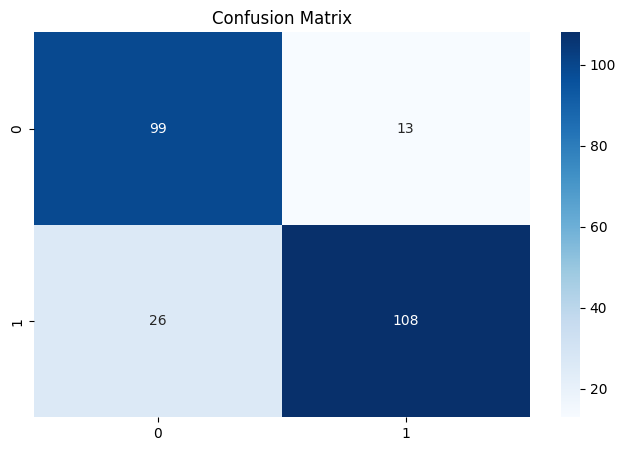

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9193097014925373
----------------------------------------------------------------------------------------------------


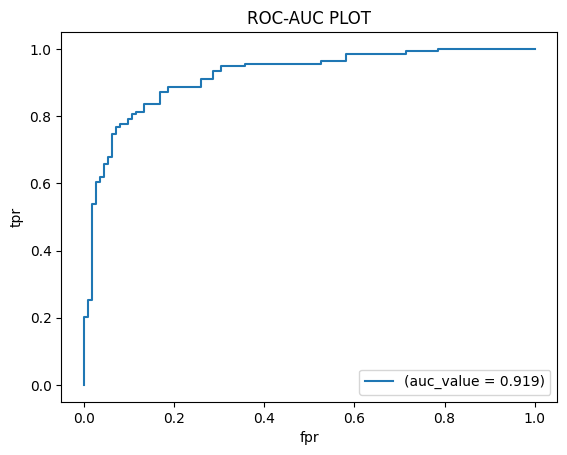

In [57]:
lr = LogisticRegression()
result(lr)

Accuracy:  0.9105691056910569
----------------------------------------------------------------------------------------------------
f1 Score:  0.9202898550724637
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       112
           1       0.89      0.95      0.92       134

    accuracy                           0.91       246
   macro avg       0.91      0.91      0.91       246
weighted avg       0.91      0.91      0.91       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


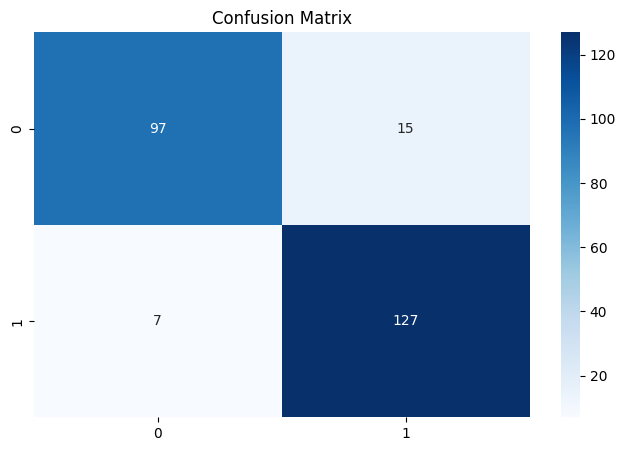

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9069163113006397
----------------------------------------------------------------------------------------------------


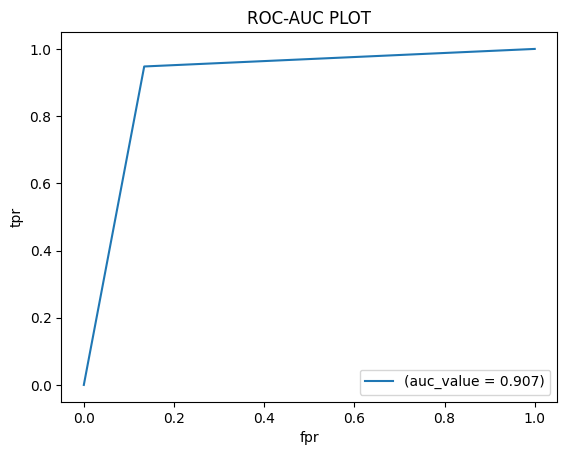

In [58]:
dt = DecisionTreeClassifier()
result(dt)

Accuracy:  0.9390243902439024
----------------------------------------------------------------------------------------------------
f1 Score:  0.945054945054945
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       112
           1       0.93      0.96      0.95       134

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


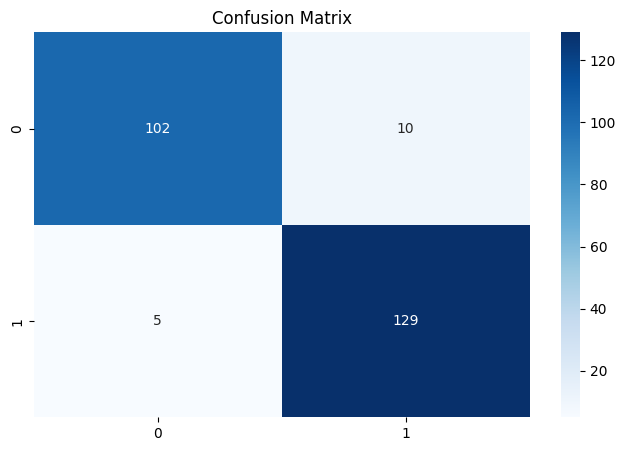

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9712486673773987
----------------------------------------------------------------------------------------------------


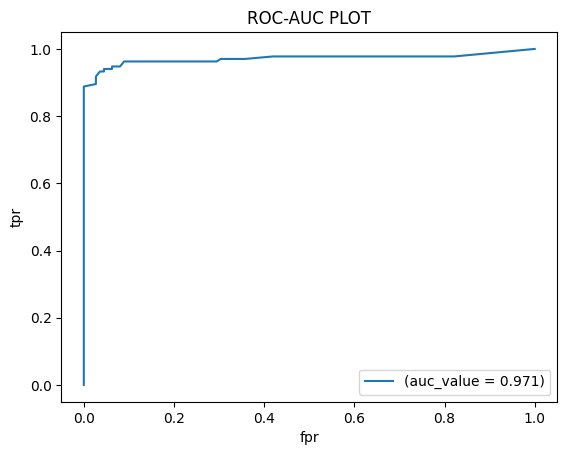

In [59]:
rf = RandomForestClassifier()
result(rf)

Accuracy:  0.8577235772357723
----------------------------------------------------------------------------------------------------
f1 Score:  0.8689138576779026
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       112
           1       0.87      0.87      0.87       134

    accuracy                           0.86       246
   macro avg       0.86      0.86      0.86       246
weighted avg       0.86      0.86      0.86       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


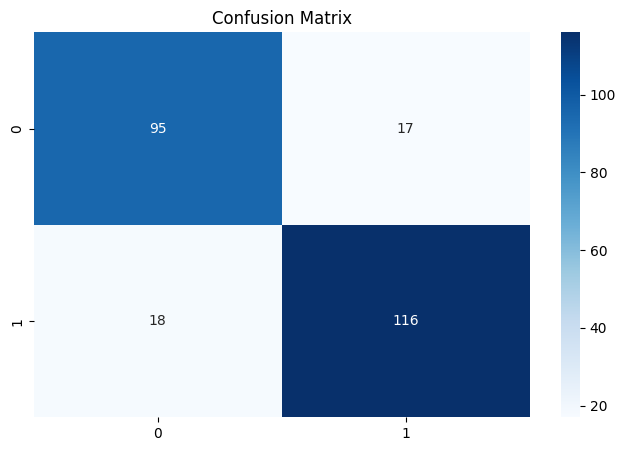

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9191098081023454
----------------------------------------------------------------------------------------------------


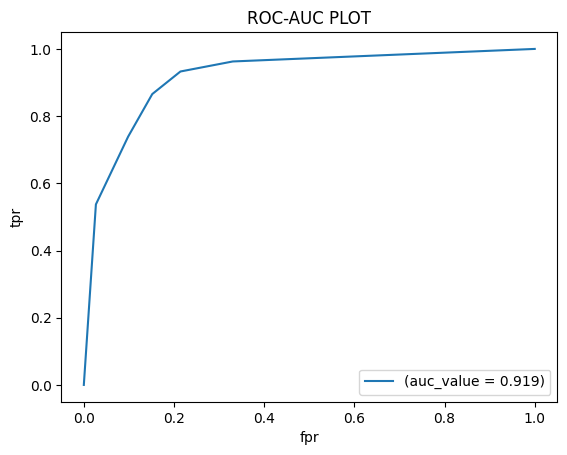

In [60]:
knn = KNeighborsClassifier()
result(knn)

Accuracy:  0.8902439024390244
----------------------------------------------------------------------------------------------------
f1 Score:  0.898876404494382
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       112
           1       0.90      0.90      0.90       134

    accuracy                           0.89       246
   macro avg       0.89      0.89      0.89       246
weighted avg       0.89      0.89      0.89       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


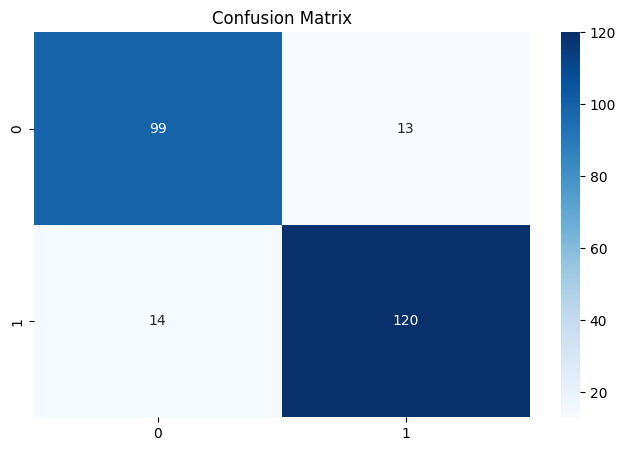

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9502931769722814
----------------------------------------------------------------------------------------------------


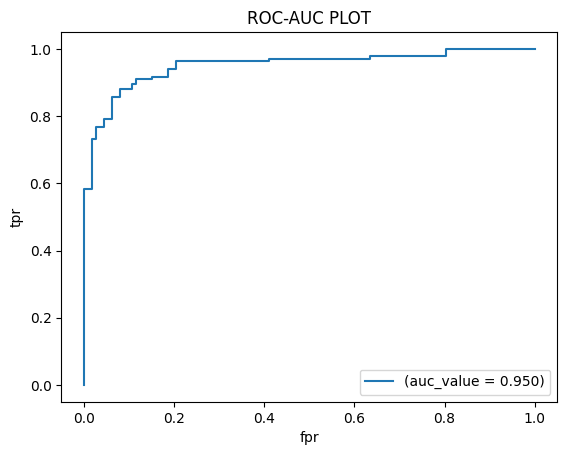

In [61]:
gb = GradientBoostingClassifier()
result(gb)

Accuracy:  0.8536585365853658
----------------------------------------------------------------------------------------------------
f1 Score:  0.859375
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.90      0.82      0.86       134

    accuracy                           0.85       246
   macro avg       0.85      0.86      0.85       246
weighted avg       0.86      0.85      0.85       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


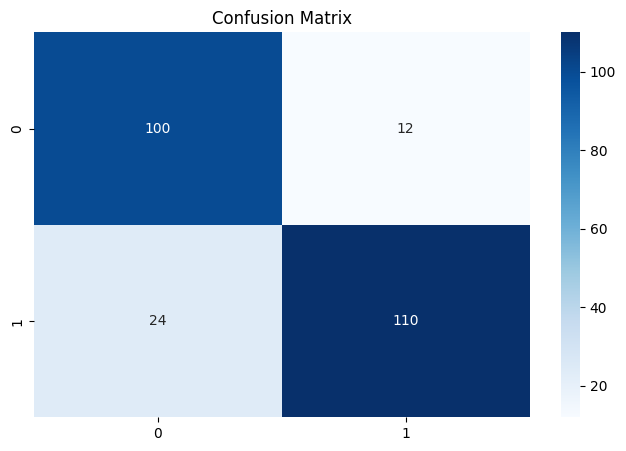

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9169776119402986
----------------------------------------------------------------------------------------------------


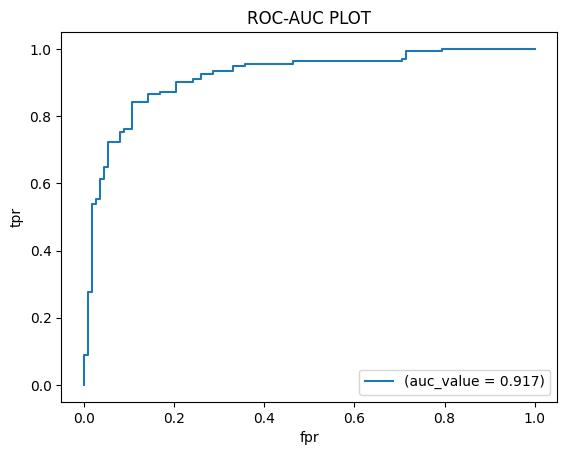

In [62]:
nb = GaussianNB()
result(nb)

Accuracy:  0.926829268292683
----------------------------------------------------------------------------------------------------
f1 Score:  0.9333333333333333
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       112
           1       0.93      0.94      0.93       134

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


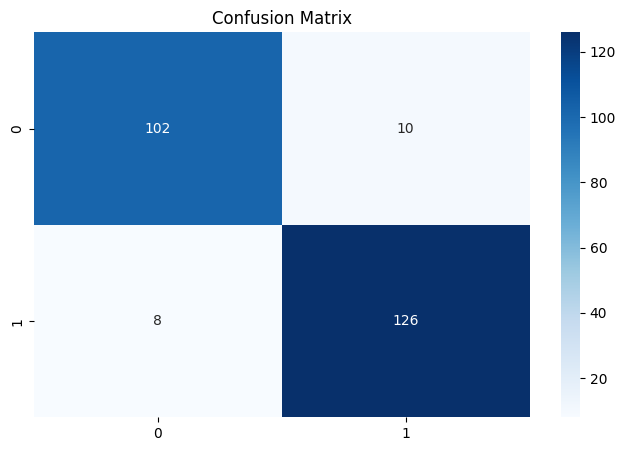

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9586220682302771
----------------------------------------------------------------------------------------------------


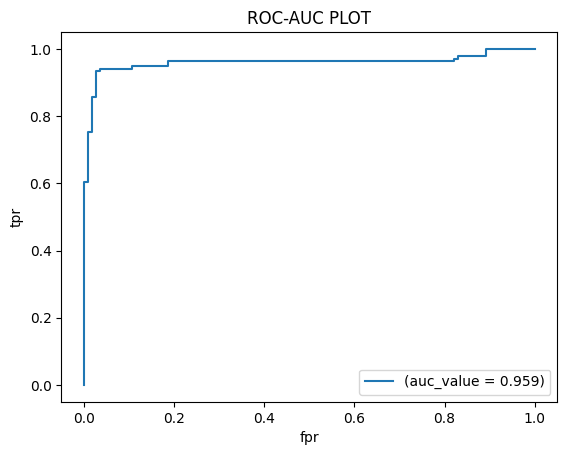

In [63]:
xgb = XGBClassifier()
result(xgb)

Accuracy:  0.8292682926829268
----------------------------------------------------------------------------------------------------
f1 Score:  0.8372093023255814
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       112
           1       0.87      0.81      0.84       134

    accuracy                           0.83       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


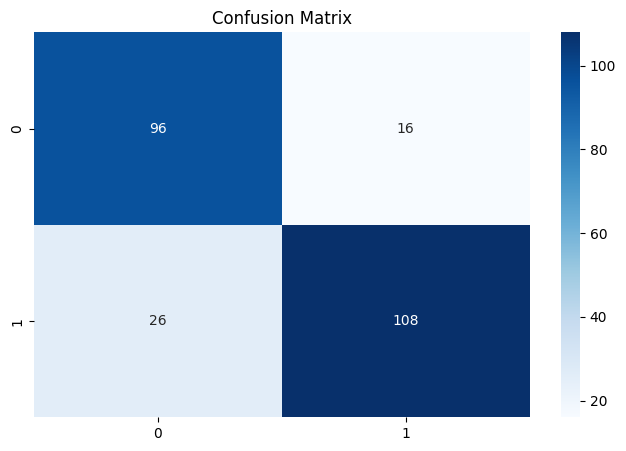

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.9047174840085289
----------------------------------------------------------------------------------------------------


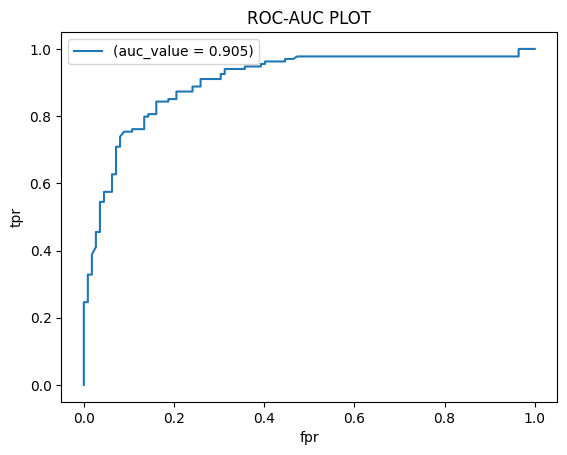

In [64]:
adb = AdaBoostClassifier()
result(adb)

Accuracy:  0.8373983739837398
----------------------------------------------------------------------------------------------------
f1 Score:  0.8473282442748091
----------------------------------------------------------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       112
           1       0.87      0.83      0.85       134

    accuracy                           0.84       246
   macro avg       0.84      0.84      0.84       246
weighted avg       0.84      0.84      0.84       246

----------------------------------------------------------------------------------------------------
Confusion Matrix : 


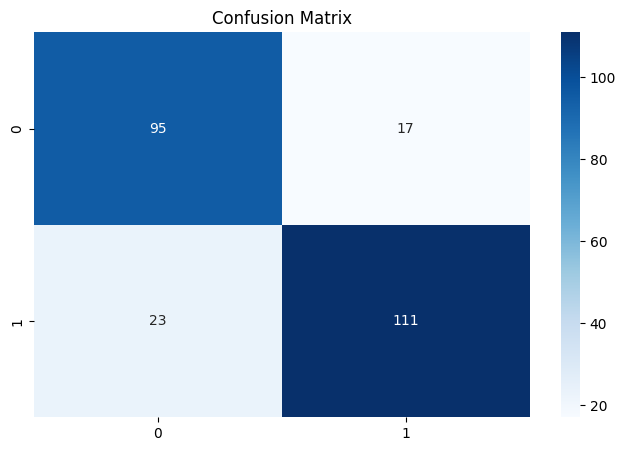

----------------------------------------------------------------------------------------------------

ROC-AUC SCORE:  0.8833955223880597
----------------------------------------------------------------------------------------------------


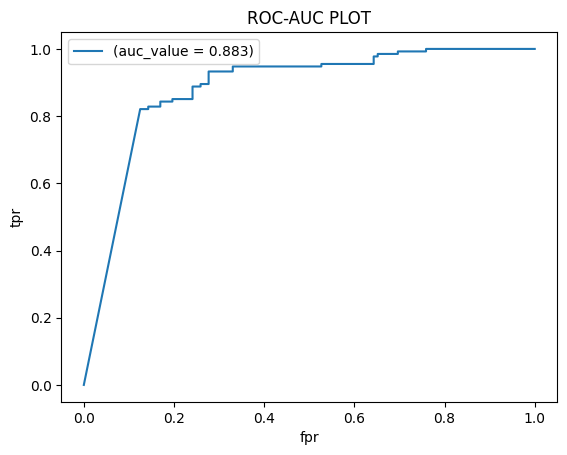

In [65]:
sgd = SGDClassifier(loss='log_loss') # changing the log function into logloss
result(sgd)

# **Model Comparison**

In [66]:
model_list = ['Logistic Regression','Decision Tree','Random Forest','KNN','Gradient Boosting','Naive Bayes','XGBoost','AdaBoost','SGD']
table = []
for i in range(0,len(model_list)):
  table_list = [model_list[i] , accuracy_list[i] , f1_list[i] , roc_auc_list[i]]
  table.append(table_list)

table = pd.DataFrame(table, columns=['Model','Accuracy','F1 Score','ROC-AUC Score'])

table = table.sort_values(by='Accuracy' , ascending=False)
table

,Model,Accuracy,F1 Score,ROC-AUC Score
2,Random Forest,0.939024,0.945055,0.971249
6,XGBoost,0.926829,0.933333,0.958622
1,Decision Tree,0.910569,0.920290,0.906916
4,Gradient Boosting,0.890244,0.898876,0.950293
3,KNN,0.857724,0.868914,0.919110
5,Naive Bayes,0.853659,0.859375,0.916978
0,Logistic Regression,0.841463,0.847059,0.919310
8,SGD,0.837398,0.847328,0.883396
7,AdaBoost,0.829268,0.837209,0.904717


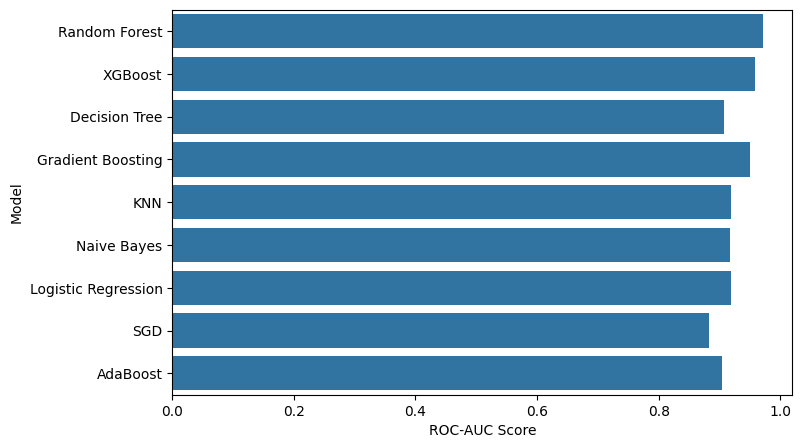

In [67]:
plt.figure(figsize=(8,5))
sns.barplot(data=table,y='Model',x='ROC-AUC Score')
plt.show()


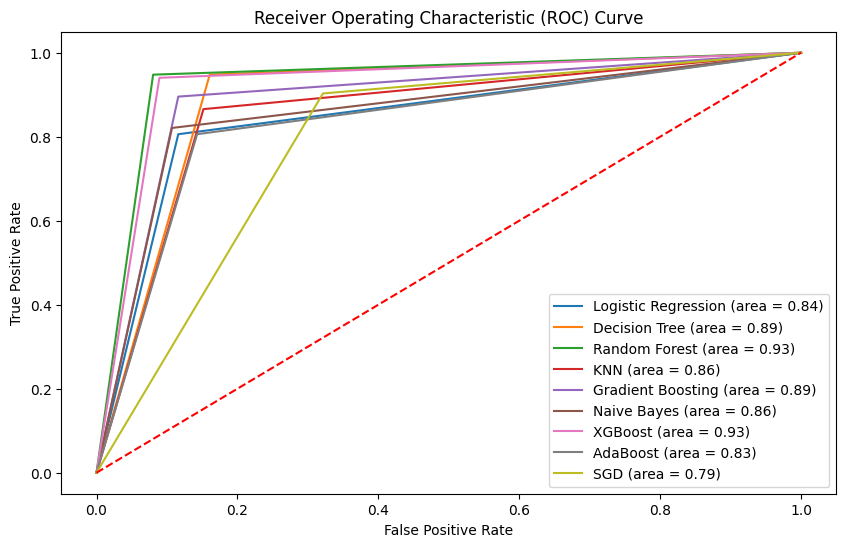

In [68]:
models = [lr,dt,rf,knn,gb,nb,xgb,adb,sgd]
plt.figure(figsize=(10,6))
for i , m in enumerate(models):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    fpr, tpr, thresholds =roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=  model_list[i] + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'r--') # diagonal line in red dashed
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


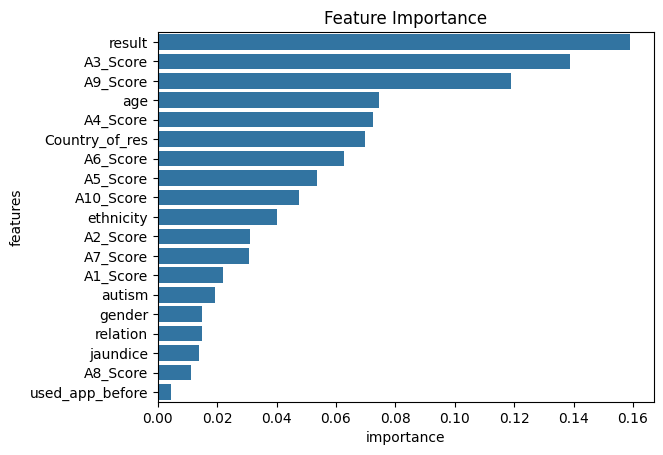

In [69]:
# important features
important_features = pd.DataFrame({'features': X.columns, 'importance': rf.feature_importances_})
important_features =  important_features.sort_values(by='importance', ascending=False)
sns.barplot(data = important_features ,x='importance',y='features')
plt.title("Feature Importance")
plt.show()


I selected the Random Forest model because it consistently performs well, showing high accuracy and ROC-AUC scores. Its ability to handle complex data relationships and its robustness to overfitting made it an ideal choice for this problem.


In [70]:
import pickle

# Save the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
